In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn import set_config
set_config(transform_output="pandas")

In [8]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


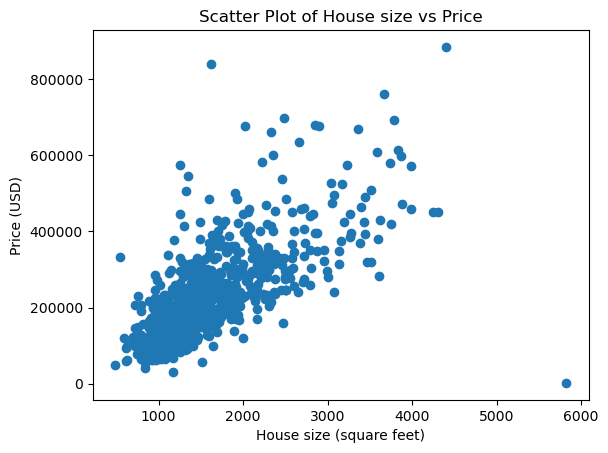

In [9]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [10]:
np.random.seed(123)

small_sacramento = sacramento.sample(n = 30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
185,2610 PHYLLIS AVE,SACRAMENTO,95820,CA,2,1,804,Residential,Mon May 19 00:00:00 EDT 2008,120000,38.531050,-121.479574
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266
487,6000 BIRCHGLADE WAY,CITRUS HEIGHTS,95621,CA,4,2,1351,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.701660,-121.323249
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761
674,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969
177,251 CHANGO CIR,SACRAMENTO,95835,CA,4,2,2218,Residential,Mon May 19 00:00:00 EDT 2008,311328,38.682370,-121.539147
217,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,-121.549049
589,7204 THOMAS DR,NORTH HIGHLANDS,95660,CA,3,2,1152,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.697898,-121.377687
696,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
602,7349 FLETCHER FARM DR,SACRAMENTO,95828,CA,4,2,1587,Residential,Mon May 19 00:00:00 EDT 2008,127500,38.490690,-121.382619


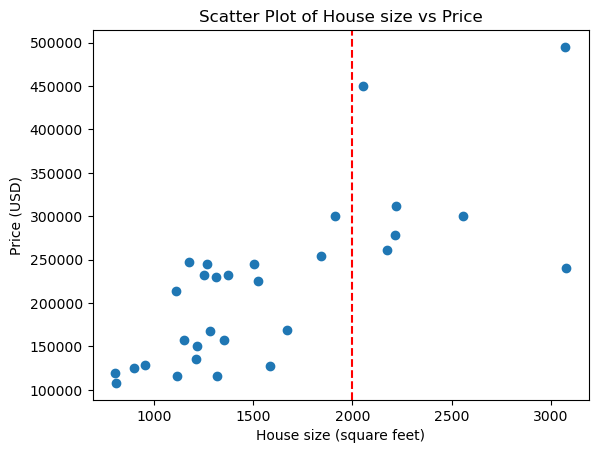

In [11]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [13]:
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()
small_sacramento["dist"]

185    1196
210     214
487     649
267     175
674     685
177     218
217     750
589     848
696     720
602     413
229     625
456      90
526     888
531     789
252     680
227      53
567     824
162     885
240     731
75     1190
388     157
657     783
279    1099
601     497
788     555
303     331
221     478
4      1076
203    1070
273    1043
Name: dist, dtype: int64

In [14]:
nearest_neighbors = small_sacramento.nsmallest(5,"dist")

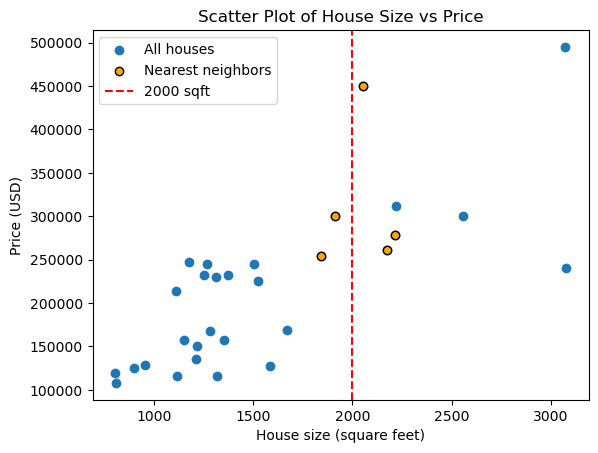

In [15]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [17]:
prediction = nearest_neighbors["price"].mean()
prediction

308740.0

In [20]:
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size= 0.75, random_state= 42
)

In [22]:
#step 1. split training data into response and predictor variables

X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [25]:
#step 2. initialize our knn regression model

knn_regression = KNeighborsRegressor()

In [26]:
#step 3. define our parameter grid
param_grid = {
    "n_neighbors" : range(1,201,3)
}

In [27]:
#step 4. intialize our grid searh
sacr_gridsearch = GridSearchCV(
    estimator= knn_regression,
    param_grid=param_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error" # we could have also done "r2"
)

In [28]:
#step 5. fit our grid search to our training data
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [29]:
#step 6 retrieve and format our cv results
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004256,0.005746,0.001690,0.000634,1,{'n_neighbors': 1},-105890.026752,-112231.281058,-104115.419672,-121332.442013,-98662.422690,-108446.318437,7763.942943,67
1,0.000884,0.000150,0.001563,0.001045,4,{'n_neighbors': 4},-87117.001504,-83019.524196,-82871.096024,-103098.798174,-83680.335865,-87957.351153,7726.766354,50
2,0.001135,0.000400,0.000872,0.000302,7,{'n_neighbors': 7},-86202.198594,-82923.124645,-75739.181533,-102054.645025,-79879.191899,-85359.668339,9032.809500,35
3,0.000739,0.000180,0.000711,0.000138,10,{'n_neighbors': 10},-84255.932907,-82860.984780,-78593.909140,-102406.069011,-74088.708013,-84441.120770,9660.567513,28
4,0.000562,0.000096,0.000566,0.000046,13,{'n_neighbors': 13},-84542.487694,-81360.591796,-79783.125422,-101024.496278,-75690.308084,-84480.201855,8749.563234,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000497,0.000039,0.001430,0.000072,187,{'n_neighbors': 187},-92653.355735,-88889.459496,-90003.143831,-101847.557165,-77854.366150,-90249.576475,7692.115406,62
63,0.000501,0.000030,0.001639,0.000251,190,{'n_neighbors': 190},-92896.658277,-89245.846175,-90268.569415,-102076.980749,-78057.902063,-90509.191336,7696.782376,63
64,0.000659,0.000159,0.001846,0.000331,193,{'n_neighbors': 193},-93010.892482,-89581.236515,-90593.644407,-102191.002197,-78189.816465,-90713.318413,7683.099687,64
65,0.000520,0.000038,0.001666,0.000169,196,{'n_neighbors': 196},-93200.152420,-89787.357083,-90770.574259,-102241.092502,-78406.556699,-90881.146593,7632.170777,65


In [30]:
results["mean_test_score"]= results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004256,0.005746,0.001690,0.000634,1,{'n_neighbors': 1},-105890.026752,-112231.281058,-104115.419672,-121332.442013,-98662.422690,108446.318437,7763.942943,67
1,0.000884,0.000150,0.001563,0.001045,4,{'n_neighbors': 4},-87117.001504,-83019.524196,-82871.096024,-103098.798174,-83680.335865,87957.351153,7726.766354,50
2,0.001135,0.000400,0.000872,0.000302,7,{'n_neighbors': 7},-86202.198594,-82923.124645,-75739.181533,-102054.645025,-79879.191899,85359.668339,9032.809500,35
3,0.000739,0.000180,0.000711,0.000138,10,{'n_neighbors': 10},-84255.932907,-82860.984780,-78593.909140,-102406.069011,-74088.708013,84441.120770,9660.567513,28
4,0.000562,0.000096,0.000566,0.000046,13,{'n_neighbors': 13},-84542.487694,-81360.591796,-79783.125422,-101024.496278,-75690.308084,84480.201855,8749.563234,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000497,0.000039,0.001430,0.000072,187,{'n_neighbors': 187},-92653.355735,-88889.459496,-90003.143831,-101847.557165,-77854.366150,90249.576475,7692.115406,62
63,0.000501,0.000030,0.001639,0.000251,190,{'n_neighbors': 190},-92896.658277,-89245.846175,-90268.569415,-102076.980749,-78057.902063,90509.191336,7696.782376,63
64,0.000659,0.000159,0.001846,0.000331,193,{'n_neighbors': 193},-93010.892482,-89581.236515,-90593.644407,-102191.002197,-78189.816465,90713.318413,7683.099687,64
65,0.000520,0.000038,0.001666,0.000169,196,{'n_neighbors': 196},-93200.152420,-89787.357083,-90770.574259,-102241.092502,-78406.556699,90881.146593,7632.170777,65


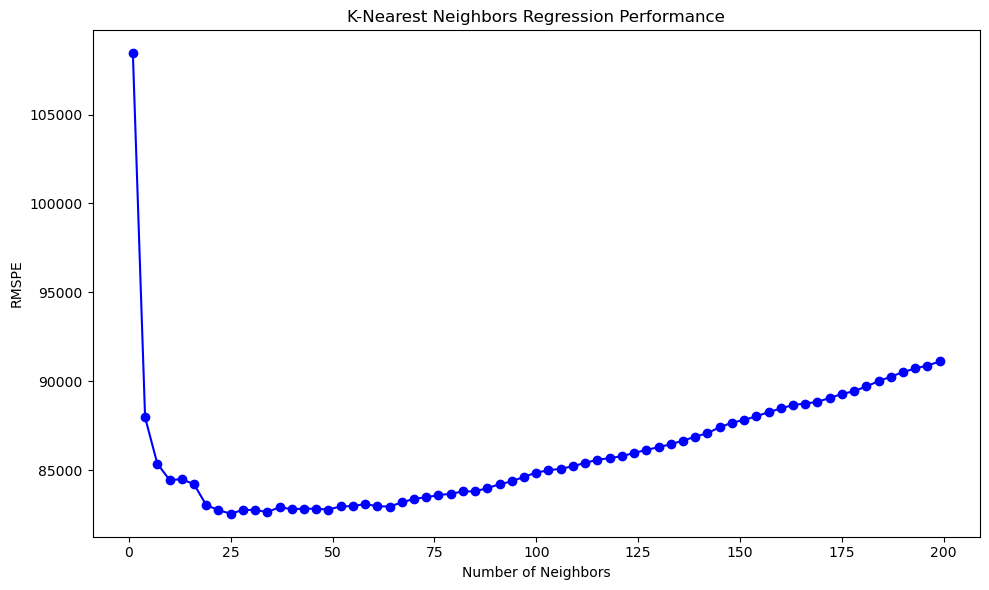

In [32]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()


In [33]:
#pull out our best k
sacr_gridsearch.best_params_

{'n_neighbors': 25}

In [34]:
#second grid search, with different scoring r2
sacr_gridsearch2 = GridSearchCV(
    estimator= knn_regression,
    param_grid=param_grid,
    cv =5 ,
    scoring = "r2"
)

In [35]:
#fit our grid search to our training data

sacr_gridsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)}, scoring='r2')

In [36]:
results_r2 = pd.DataFrame(sacr_gridsearch2.cv_results_)
results_r2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001787,0.001529,0.000967,0.000279,1,{'n_neighbors': 1},0.208601,0.089465,0.242324,0.002166,0.159188,0.140349,0.086135,67
1,0.000710,0.000050,0.000731,0.000065,4,{'n_neighbors': 4},0.464338,0.501771,0.519980,0.279537,0.395157,0.432156,0.087472,51
2,0.000670,0.000077,0.001237,0.001038,7,{'n_neighbors': 7},0.475528,0.502927,0.599046,0.294056,0.448859,0.464083,0.098991,38
3,0.000671,0.000057,0.000743,0.000103,10,{'n_neighbors': 10},0.498944,0.503672,0.568251,0.289186,0.525868,0.477184,0.097141,28
4,0.000696,0.000210,0.000698,0.000076,13,{'n_neighbors': 13},0.495530,0.521483,0.555087,0.308236,0.505147,0.477097,0.086825,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001138,0.000421,0.002789,0.001107,187,{'n_neighbors': 187},0.394091,0.428825,0.433802,0.296918,0.476446,0.406016,0.060493,62
63,0.000601,0.000130,0.001880,0.000308,190,{'n_neighbors': 190},0.390904,0.424236,0.430457,0.293747,0.473705,0.402610,0.060474,63
64,0.000606,0.000121,0.001813,0.000225,193,{'n_neighbors': 193},0.389405,0.419900,0.426348,0.292168,0.471925,0.399949,0.060005,64
65,0.000517,0.000058,0.001478,0.000047,196,{'n_neighbors': 196},0.386918,0.417227,0.424105,0.291474,0.468993,0.397743,0.059264,65


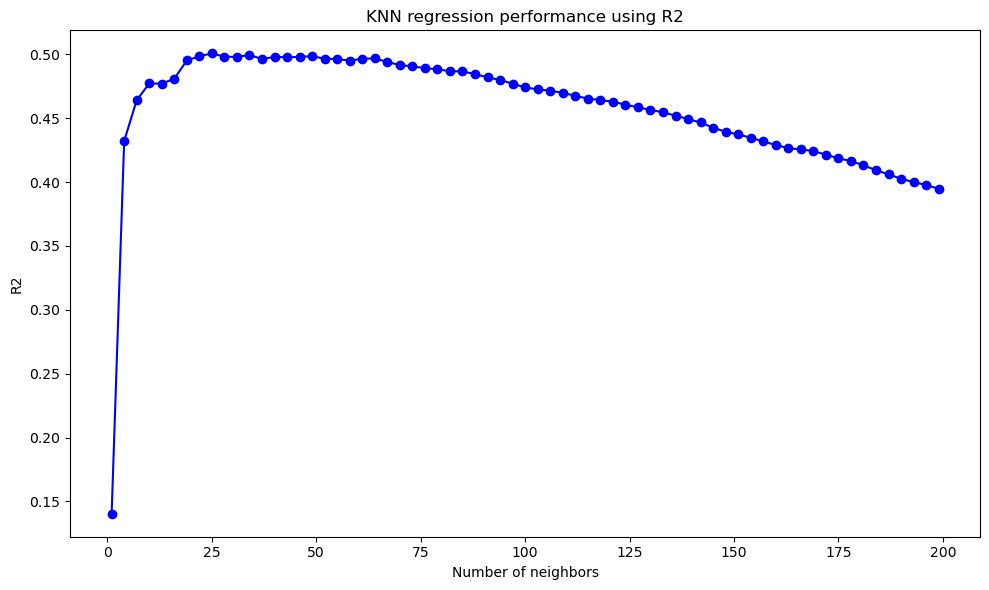

In [37]:
plt.figure(figsize =(10,6))
plt.plot(results_r2['param_n_neighbors'], results_r2['mean_test_score'],
         '-o', color = "blue")

#add labels and legends
plt.xlabel("Number of neighbors")
plt.ylabel("R2")
plt.title("KNN regression performance using R2")
plt.tight_layout()
plt.show()

In [38]:
sacr_gridsearch2.best_params_

{'n_neighbors': 25}

In [39]:
#make predictions on the test set

sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

#calculate RMSE

rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**0.5

rmspe

93634.69577882248

In [40]:
#calculate R2

r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)

r2

0.45082651021528064

/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


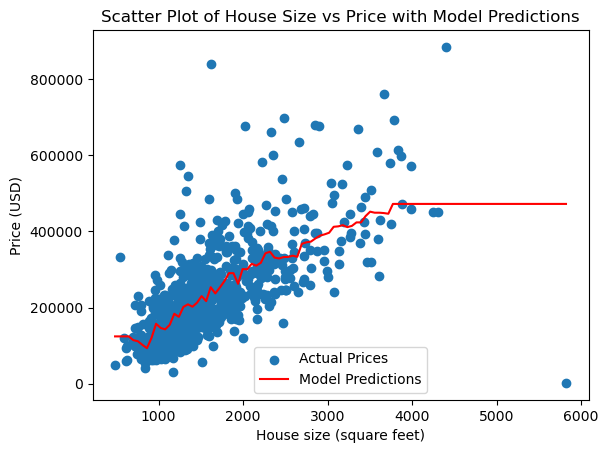

In [41]:
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();


In [46]:
sacr_gridsearch2.predict([[10000]])

/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([472300.76])

In [47]:
import math

In [48]:
def rmspe(y_true, y_pred):
    n = len(y_true)
    squared_errors = []
    for i in range(n):
        error = y_true[i] - y_pred[i]
        squared_errors.append(error**2)
    mean_squared_error = sum(squared_errors) / n 
    rmspe_value = math.sqrt(mean_squared_error)
    return rmspe_value